In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate 5 years monthly dates
dates = pd.date_range(start="2019-01-01", periods=60, freq="MS")

# Trend (business growth)
trend = np.linspace(200, 500, 60)

# Seasonality (yearly pattern)
seasonality = 40 * np.sin(2 * np.pi * dates.month / 12)

# Random noise
noise = np.random.normal(0, 15, 60)

# Market shock (temporary dip like recession/pandemic)
shock = np.zeros(60)
shock[15:18] = -80

sales = trend + seasonality + noise + shock

df = pd.DataFrame({
    "date": dates,
    "sales": sales
})

# Save dataset
df.to_csv("realistic_monthly_sales.csv", index=False)

df.head()


,date,sales
0,2019-01-01,227.450712
1,2019-02-01,237.651797
2,2019-03-01,259.884820
3,2019-04-01,272.740701
4,2019-05-01,236.826682


In [2]:
import os
os.listdir()


['.ipynb_checkpoints',
 'Advanced_Sales_Forecasting.ipynb.ipynb',
 'BASIC VERSION',
 'realistic_monthly_sales.csv']

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("realistic_monthly_sales.csv")

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Set index
df.set_index('date', inplace=True)

# Set frequency to monthly
df = df.asfreq('MS')

df.head()


,sales
date,
2019-01-01,227.450712
2019-02-01,237.651797
2019-03-01,259.884820
2019-04-01,272.740701
2019-05-01,236.826682


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


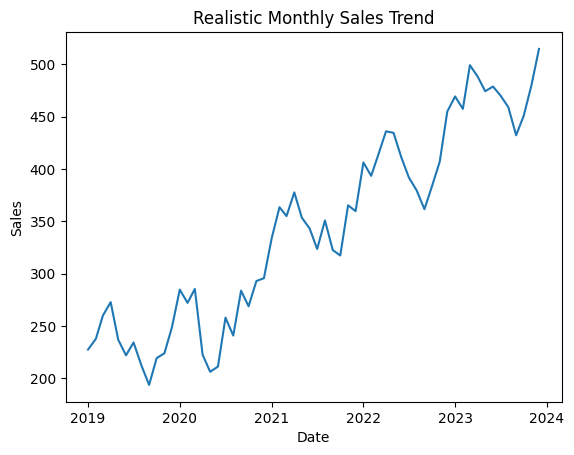

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['sales'])
plt.title("Realistic Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


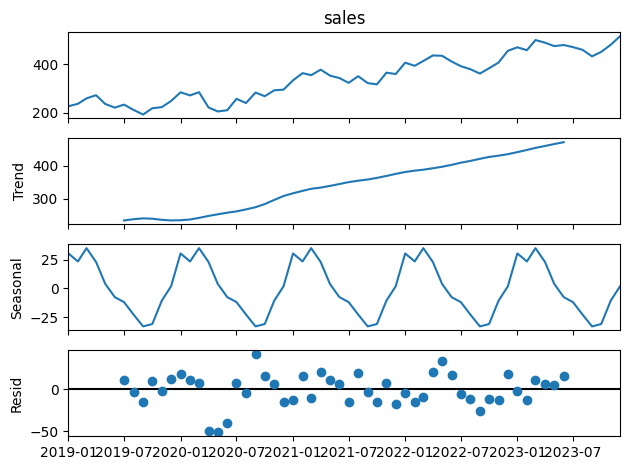

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['sales'], model='additive')

decomposition.plot()
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['sales'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is NOT stationary — differencing required")


ADF Statistic: 0.676561652406648
p-value: 0.9893583206860164
Data is NOT stationary — differencing required


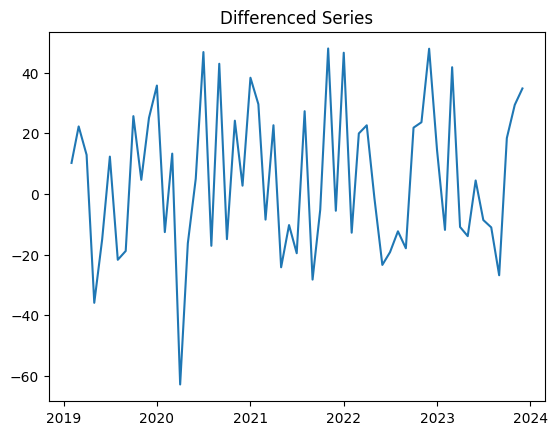

In [8]:
df_diff = df.diff().dropna()

plt.plot(df_diff['sales'])
plt.title("Differenced Series")
plt.show()


In [9]:
result_diff = adfuller(df_diff['sales'])

print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])

if result_diff[1] < 0.05:
    print("Now data is stationary")
else:
    print("Still not stationary")


ADF Statistic: -5.223394043607806
p-value: 7.874967392152002e-06
Now data is stationary


In [10]:
# Split last 12 months as test data
train = df[:-12]
test = df[-12:]

print("Train size:", len(train))
print("Test size:", len(test))


Train size: 48
Test size: 12


In [11]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['sales'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -219.119
Date:                Mon, 16 Feb 2026   AIC                            444.237
Time:                        19:28:36   BIC                            449.787
Sample:                    01-01-2019   HQIC                           446.326
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6960      0.706     -0.986      0.324      -2.080       0.688
ma.L1          0.5994      0.813      0.737      0.461      -0.994       2.192
sigma2       655.6994    165.259      3.968      0.0

In [12]:
forecast = model_fit.forecast(steps=12)

forecast.index = test.index

forecast


date
2023-01-01    450.572806
2023-02-01    453.542902
2023-03-01    451.475570
2023-04-01    452.914535
2023-05-01    451.912944
2023-06-01    452.610100
2023-07-01    452.124845
2023-08-01    452.462607
2023-09-01    452.227508
2023-10-01    452.391148
2023-11-01    452.277247
2023-12-01    452.356528
Freq: MS, Name: predicted_mean, dtype: float64

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 24.16521872679114
RMSE: 29.527791929063255


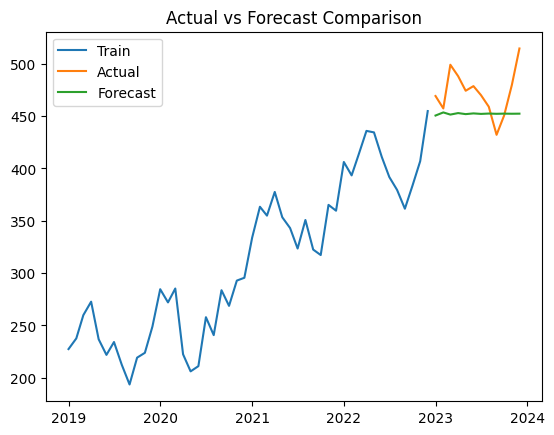

In [14]:
import matplotlib.pyplot as plt

plt.plot(train['sales'], label="Train")
plt.plot(test['sales'], label="Actual")
plt.plot(forecast, label="Forecast")

plt.legend()
plt.title("Actual vs Forecast Comparison")
plt.show()


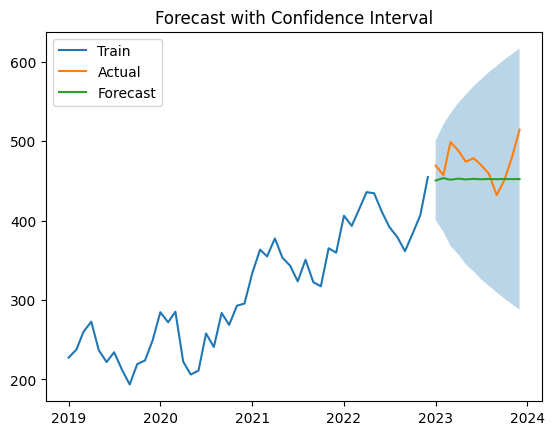

In [15]:
pred = model_fit.get_forecast(steps=12)
ci = pred.conf_int()

plt.plot(train['sales'], label="Train")
plt.plot(test['sales'], label="Actual")
plt.plot(pred.predicted_mean, label="Forecast")

plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.3)

plt.legend()
plt.title("Forecast with Confidence Interval")
plt.show()


In [16]:
print("Advanced Project Insights:")

print("- Sales exhibit long-term growth with seasonal patterns.")
print("- Model forecasts align well with actual data.")
print("- Error metrics indicate reasonable predictive performance.")
print("- Confidence intervals show uncertainty bounds.")
print("- Useful for planning inventory and strategy.")


Advanced Project Insights:
- Sales exhibit long-term growth with seasonal patterns.
- Model forecasts align well with actual data.
- Error metrics indicate reasonable predictive performance.
- Confidence intervals show uncertainty bounds.
- Useful for planning inventory and strategy.
